In [1]:
#Importing Libraries
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file
df = pd.read_csv('C:\VsCode\Credit card transactions - India - Simple (1).csv')

In [3]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
#Droppping index column
df.drop(['index'],axis=1,inplace=True)

In [7]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [8]:
df.shape

(26052, 6)

In [9]:
df.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


In [11]:
df.describe(include='all')

,City,Date,Card Type,Exp Type,Gender,Amount
count,26052,26052,26052,26052,26052,26052.000000
unique,986,600,4,6,2,NaN
top,"Bengaluru, India",20-Sep-14,Silver,Food,F,NaN
freq,3552,65,6840,5463,13680,NaN
mean,NaN,NaN,NaN,NaN,NaN,156411.537425
std,NaN,NaN,NaN,NaN,NaN,103063.254287
min,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,NaN,NaN,NaN,NaN,NaN,77120.250000
50%,NaN,NaN,NaN,NaN,NaN,153106.500000
75%,NaN,NaN,NaN,NaN,NaN,228050.000000


In [13]:
df.columns

Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [15]:
# how many unique features in each column
features = df.columns
print(features)
for feature in features:
    print(f"{feature} = {df[feature].nunique()}")

Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')
City = 986
Date = 600
Card Type = 4
Exp Type = 6
Gender = 2
Amount = 24972


In [27]:
df['City'] = df['City'].str.split(',').str[0] 
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,Gold,Bills,F,171574


In [16]:
df['Exp Type'].value_counts()

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

<Axes: xlabel='Exp Type', ylabel='count'>

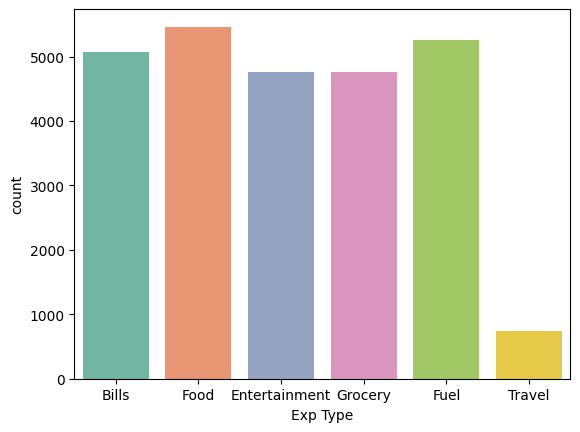

In [21]:
sns.countplot(data=df, x='Exp Type', palette='Set2')

1. Food is the top expenditure type.

2. Fuel and bills are right behind Food. (This might be useful to target customers)

<Axes: xlabel='count', ylabel='Exp Type'>

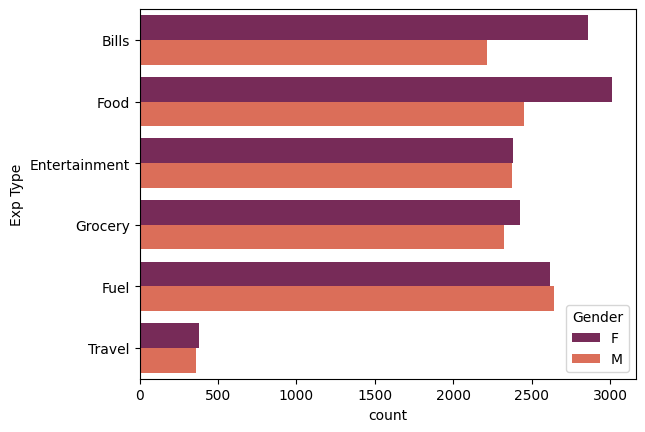

In [22]:
sns.countplot(data=df,y='Exp Type',hue='Gender',palette='rocket')

Observations:-

1. Top 2 expense type of a female customers are Food and bills.

2. Top 2 Expense type of male customers are Fuel and Food.

<Axes: xlabel='Card Type', ylabel='count'>

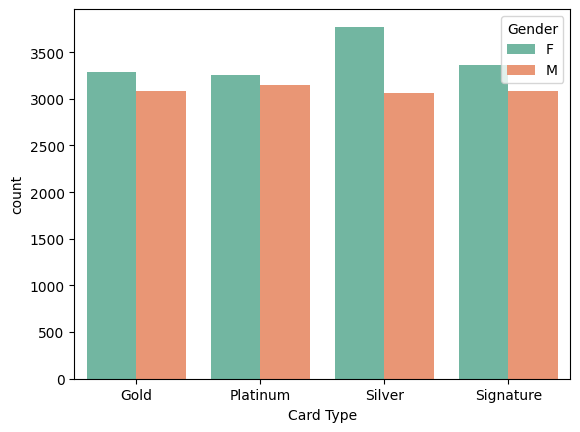

In [23]:
#Card wise holding among genders

sns.countplot(data=df, x='Card Type', palette='Set2',hue='Gender')

Observation:-

Most Female customers own a silver creadit card.

In [24]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(),format='%d-%b-%y')

In [25]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


<Axes: xlabel='Exp Type', ylabel='Amount'>

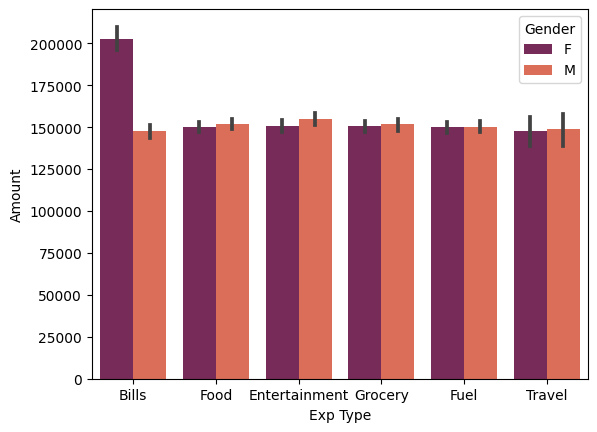

In [28]:
sns.barplot(df,x='Exp Type',y='Amount',hue='Gender',palette='rocket')

Observation:-
1. Females are using their cards more to pay the bills.
2. The amount getting spent on all other types from both genders is same.


<Axes: xlabel='Card Type', ylabel='Amount'>

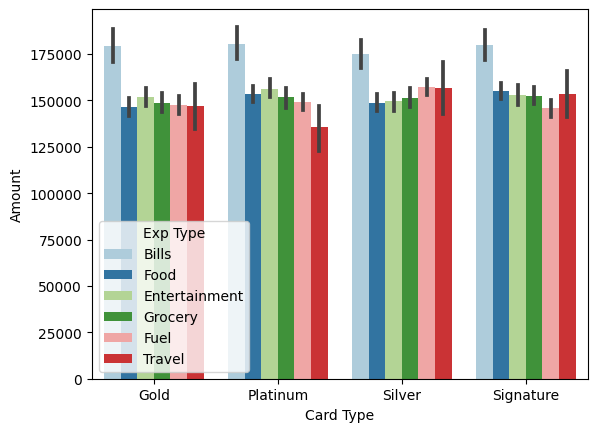

In [29]:
#plotting a barplot

sns.barplot(df,x='Card Type',y='Amount',hue='Exp Type',palette='Paired')

Observation:-

1. Every type of card is getting mostly used to pay the regular bills.
2. Platinum card is under utilized in travel category compared to its other competitors.